# Machine Learning Project
## Dataset: Letter-Recognition from UCI Repository

### Problem Description
The Letter Recognition Project aims to develop a machine learning model that can accurately classify letters based on their visual features. The project utilizes various classification algorithms, including SVM, KNN, Decision Trees and Naive Bayes, to achieve high accuracy in letter classification. It includes data preprocessing steps, model training, evaluation, and visualization of results.

### Dataset
Dataset Characteristics: It is multivariate, pertaining to the subject area of computer science, and is primarily used for classification tasks.

Feature Type: The features are integers.

Number of Instances: There are 20,000 instances in the dataset.

Number of Features: The dataset contains 16 features.

The dataset was created using images based on 20 different fonts. Each letter within these fonts was randomly distorted to produce a total of 20,000 unique stimuli. These stimuli were then converted into 16 primitive numerical attributes, which include statistical moments and edge counts. These attributes were scaled to fit into a range of integer values from 0 through 15.

Group Members: 
Akansha Sharma 21HCS4108
Jaya Negi 21HCS4144
Kritika Dhawan 21HCS4151
Neha Das 21HCS4160
Neha Kriplani 21HCS4161

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [2]:
cols = ['lettr', 'x-box', 'y-box', 'width', 'high', 'onpix', 'x-bar', 'y-bar', 'x2bar', 'y2bar', 'xybar', 'x2ybr', 'xy2br', 'x-ege', 'xegvy', 'y-ege', 'yegvx']
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/letter-recognition/letter-recognition.data"
data = pd.read_csv(url, header=None, names=cols)
X = data.iloc[:,1:]
y = data.iloc[:,0]

In [4]:
data.head()

,lettr,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [4]:
data.shape

(20000, 17)

In [5]:
data.describe()

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


# VISUALISATION OF DATA

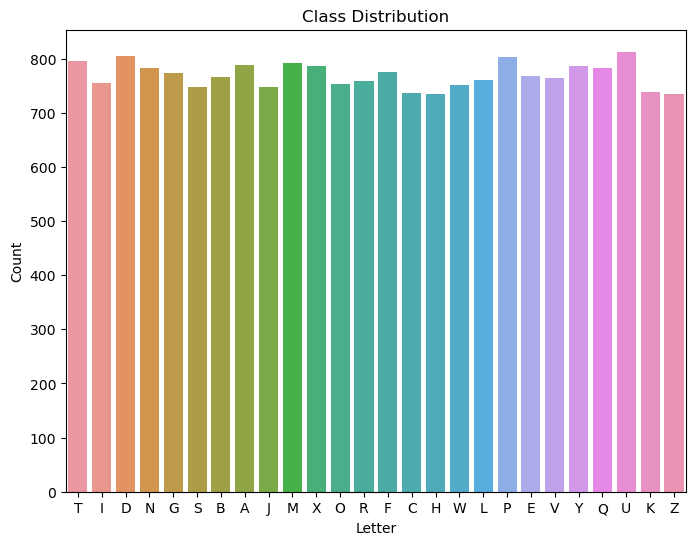

lettr
A    789
B    766
C    736
D    805
E    768
F    775
G    773
H    734
I    755
J    747
K    739
L    761
M    792
N    783
O    753
P    803
Q    783
R    758
S    748
T    796
U    813
V    764
W    752
X    787
Y    786
Z    734
dtype: int64


In [10]:
plt.figure(figsize=(8, 6))
sns.countplot(x=y)
plt.xlabel('Letter')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

print(data.groupby('lettr').size())

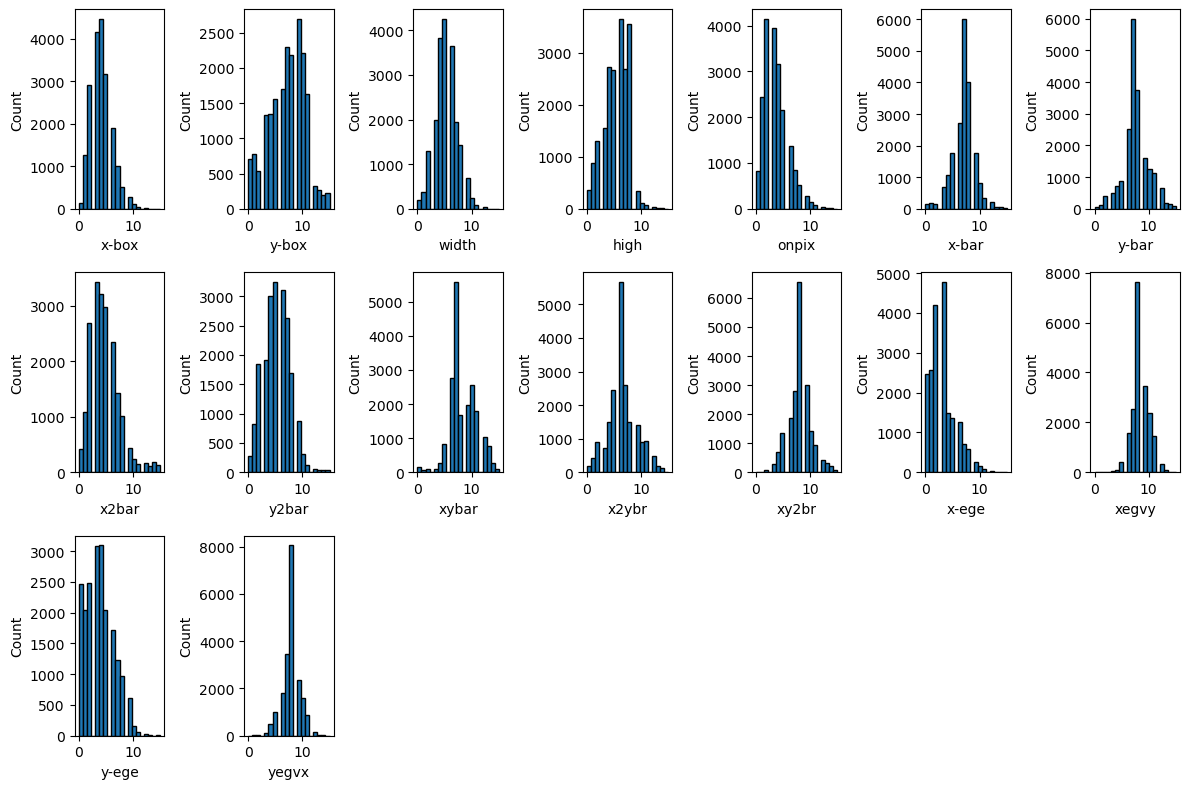

In [11]:
plt.figure(figsize=(12, 8))
for i, column in enumerate(X.columns):
    plt.subplot(3, 7, i + 1)
    plt.hist(X[column], bins=20, edgecolor='black')
    plt.xlabel(column)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [19]:
data['lettr']

0        T
1        I
2        D
3        N
4        G
        ..
19995    D
19996    C
19997    T
19998    S
19999    A
Name: lettr, Length: 20000, dtype: object

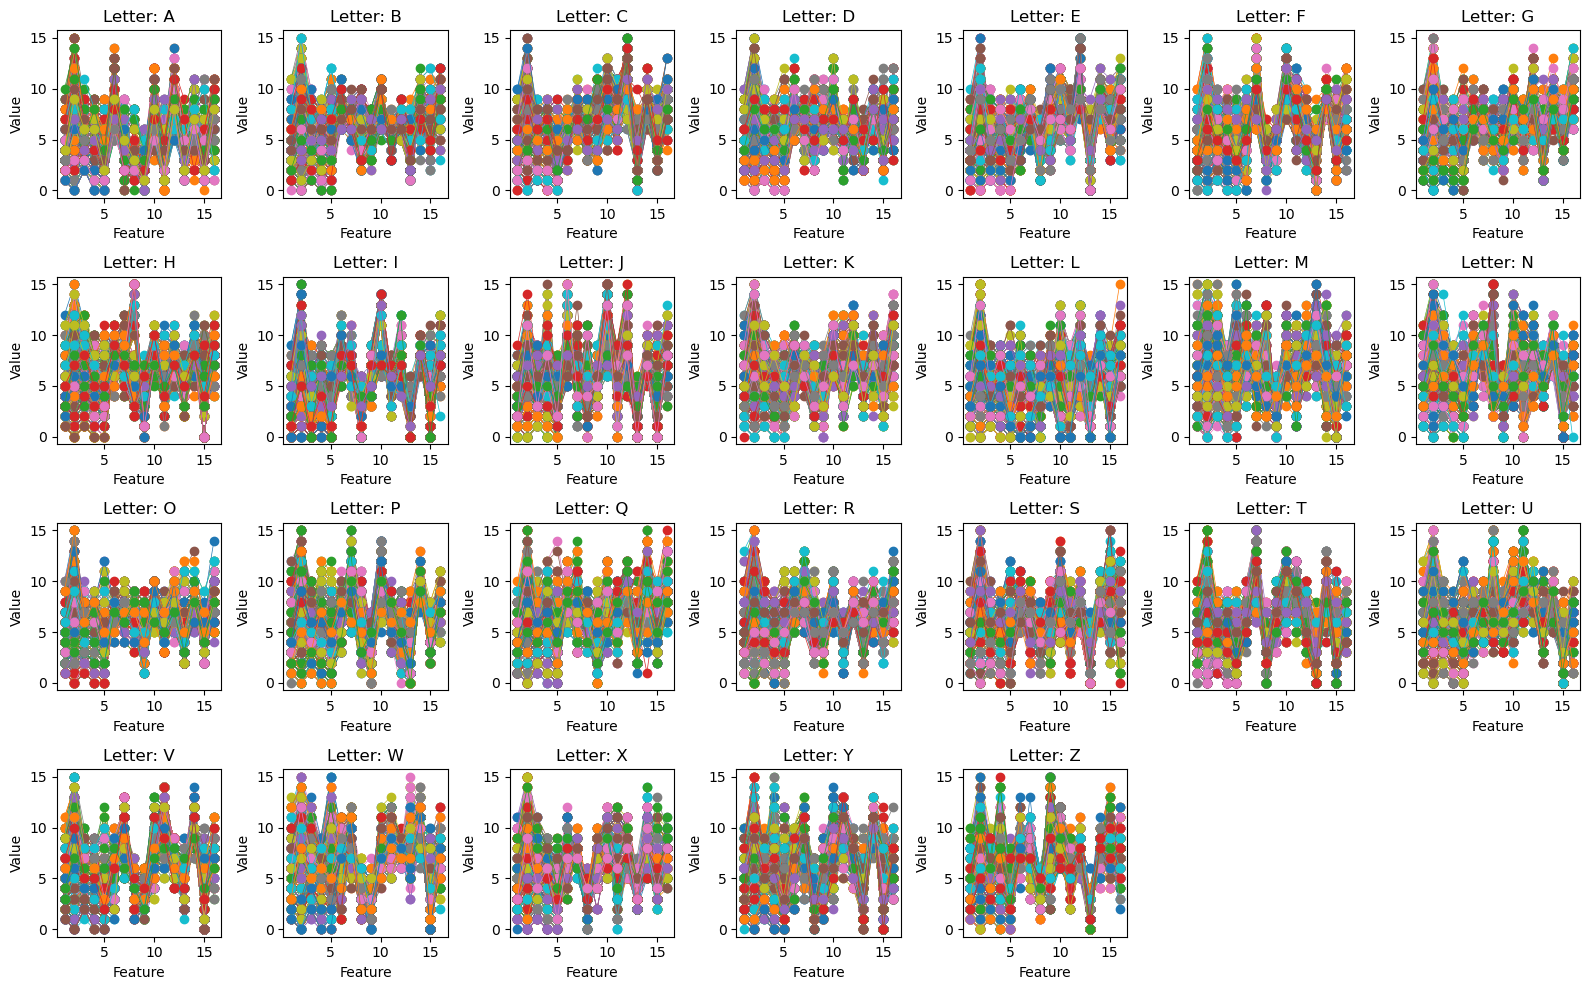

In [23]:
unique_letters = sorted(data['lettr'].unique())

plt.figure(figsize=(16, 10))
for i, letter in enumerate(unique_letters):
    plt.subplot(4, 7, i + 1)
    letter_data = data[data['lettr'] == letter].drop(columns='lettr')
    letter_data = letter_data.reset_index(drop=True)
    for j in range(len(letter_data)):
        plt.plot(range(1, len(letter_data.columns) + 1), letter_data.iloc[j, :], marker='o', linewidth=0.5)
    plt.xlabel('Feature')
    plt.ylabel('Value')
    plt.title(f'Letter: {letter}')
plt.tight_layout()
plt.show()

## Pre Processing

### Cleaning:
Missing Values: None

Noise: The image data is transformed into statistical features having integer values, noise in these values is comparatively low than the noise in raw pixel data.
*Image Data is transformed into statistical features by: Feature Extraction, Normalization(size, intensity), Grayscale Conversion, Scaling.*

Outliers: The dataset contains random distorted images, so the outliers can be valid instances of the dataset.

Outliers can be found through:
Box Plot,
Statistical Tests(z-score etc.)

BoxPlot can depict outliers.

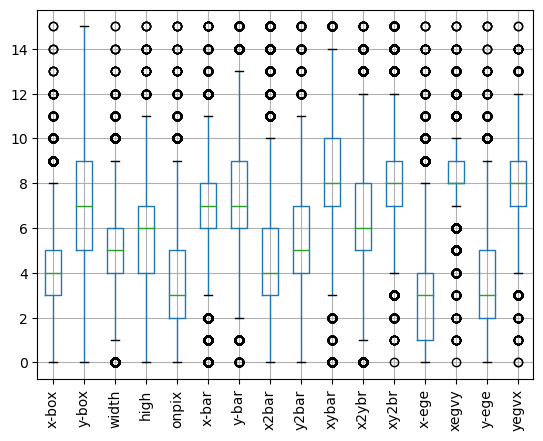

In [6]:
bx=data.boxplot()
plt.xticks(rotation='vertical')
plt.show()

In [29]:
'''Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = ((data < lower_bound) | (data > upper_bound)).any(axis=1)

data[outliers]'''

C:\Users\lenovo\AppData\Local\Temp\ipykernel_21492\268106424.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = data.quantile(0.25)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_21492\268106424.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = data.quantile(0.75)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_21492\268106424.py:10: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((data < lower_bound) | (data > upper_bound)).any(axis=1)


,lettr,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19992,E,4,9,5,6,3,5,9,2,10,10,8,9,2,8,5,5
19994,T,5,8,7,7,7,7,9,4,8,7,7,8,3,10,8,6
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


# Modeling

HOLDOUT METHOD

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### DECISION TREE MODEL

In [29]:
dt_model = DecisionTreeClassifier(criterion='entropy') #We can specify hyperparameters such as max_depth, minimum samples split, criterion for the split.
dt_model.fit(X_train, y_train)

dt_predictions = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)

dt_precision = precision_score(y_test, dt_predictions, average='weighted')
dt_recall = recall_score(y_test, dt_predictions, average='weighted')
dt_f1 = f1_score(y_test, dt_predictions, average='weighted')
#average='weighted' parameter is used to compute metrics for each label and return their weighted average. This is useful in multiclass classification where you have imbalance in class distribution.

To look into the overfitting issue with the decision tree model, we can use the max_depth hyperparameter.

In [30]:
print("Accuracy: ",dt_accuracy,"\nPrecision", dt_precision,"\nRecall: ", dt_recall,"\nF-1 Score: ", dt_f1)

Accuracy:  0.894 
Precision 0.8949079353043734 
Recall:  0.894 
F-1 Score:  0.8939663639430012


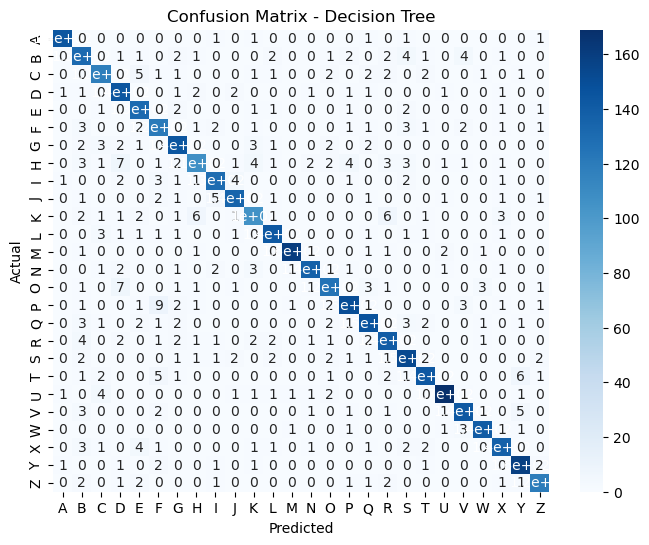

In [31]:
plt.figure(figsize=(8, 6))
dt_cm = pd.crosstab(y_test, dt_predictions, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(dt_cm, annot=True, cmap='Blues')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

### NAIVE BAYES CLASSIFIER

In [16]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

nb_predictions = nb_model.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_predictions)

nb_precision = precision_score(y_test, nb_predictions, average='weighted')
nb_recall = recall_score(y_test, nb_predictions, average='weighted')
nb_f1 = f1_score(y_test, nb_predictions, average='weighted')

In [17]:
print("Accuracy: ",nb_accuracy,"\nPrecision", nb_precision,"\nRecall: ", nb_recall,"\nF-1 Score: ", nb_f1)

Accuracy:  0.54675 
Precision 0.5562713927046209 
Recall:  0.54675 
F-1 Score:  0.5343084205073579


In [ ]:
plt.figure(figsize=(8, 6))
nb_cm = pd.crosstab(y_test, nb_predictions, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(nb_cm, annot=True, cmap='Blues')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()

### KNN

In [73]:
knn_model = KNeighborsClassifier(metric="minkowski", p=2)
knn_model.fit(X_train, y_train)

knn_predictions = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)

knn_precision = precision_score(y_test, knn_predictions, average='weighted')
knn_recall = recall_score(y_test, knn_predictions, average='weighted')
knn_f1 = f1_score(y_test, knn_predictions, average='weighted')

In [74]:
print("Accuracy: ",knn_accuracy,"\nPrecision", knn_precision,"\nRecall: ", knn_recall,"\nF-1 Score: ", knn_f1)

Accuracy:  0.952 
Precision 0.9531408466075997 
Recall:  0.952 
F-1 Score:  0.9521000163571941


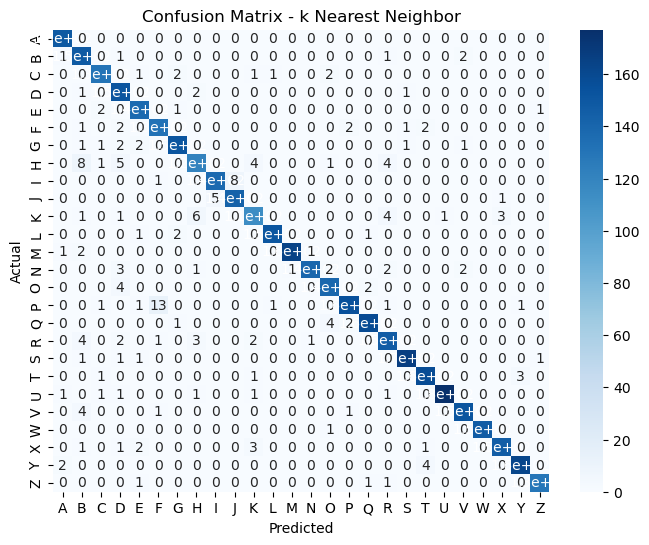

In [24]:
plt.figure(figsize=(8, 6))
knn_cm = pd.crosstab(y_test, knn_predictions, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(knn_cm, annot=True, cmap='Blues')
plt.title('Confusion Matrix - k Nearest Neighbor')
plt.show()

In [50]:
print("Accuracy: ",log_accuracy,"\nPrecision", log_precision,"\nRecall: ", log_recall,"\nF-1 Score: ", log_f1)

Accuracy:  0.76825 
Precision 0.7665300592144902 
Recall:  0.76825 
F-1 Score:  0.7657143909269907


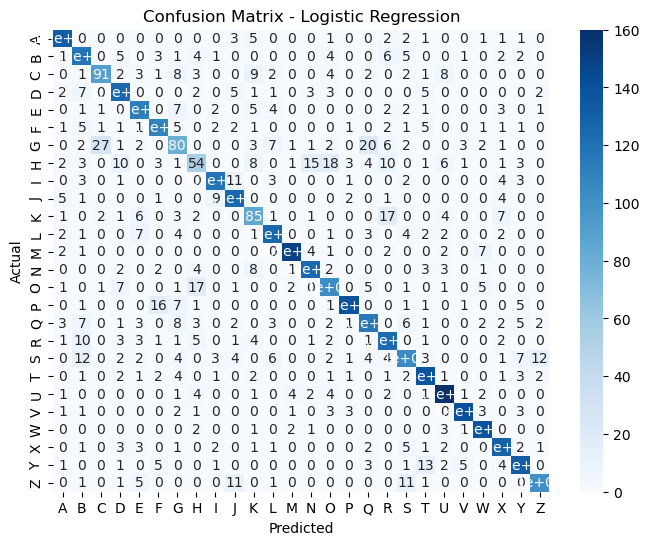

In [51]:
plt.figure(figsize=(8, 6))
log_cm = pd.crosstab(y_test, log_predictions, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(log_cm, annot=True, cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

### LOGISTIC REGRESSION

In [60]:
lr = LogisticRegression(multi_class='ovr')
lr.fit(X_train, y_train)

log_predictions = lr.predict(X_test)
log_accuracy = accuracy_score(y_test, log_predictions)

log_precision = precision_score(y_test, log_predictions, average='weighted')
log_recall = recall_score(y_test, log_predictions, average='weighted')
log_f1 = f1_score(y_test, log_predictions, average='weighted')

C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [61]:
print("Accuracy: ",log_accuracy,"\nPrecision", log_precision,"\nRecall: ", log_recall,"\nF-1 Score: ", log_f1)

Accuracy:  0.73475 
Precision 0.7362543589403244 
Recall:  0.73475 
F-1 Score:  0.7333349249152917


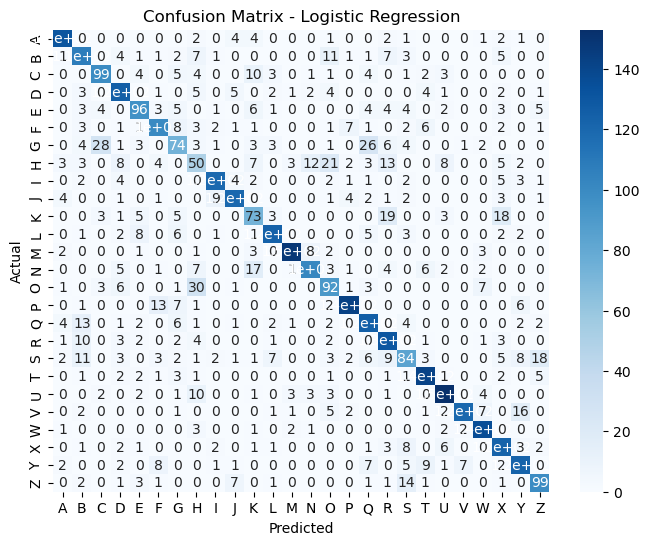

In [75]:
plt.figure(figsize=(8, 6))
log_cm = pd.crosstab(y_test, log_predictions, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(log_cm, annot=True, cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

### SUPPORT VECTOR MACHINE(SVM)

In [53]:
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)

svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)

svm_precision = precision_score(y_test, svm_predictions, average='weighted')
svm_recall = recall_score(y_test, svm_predictions, average='weighted')
svm_f1 = f1_score(y_test, svm_predictions, average='weighted')

In [10]:
print("Accuracy: ",svm_accuracy,"\nPrecision", svm_precision,"\nRecall: ", svm_recall,"\nF-1 Score: ", svm_f1)

Accuracy:  0.9305 
Precision 0.9345960157935597 
Recall:  0.9305 
F-1 Score:  0.9307689684025758


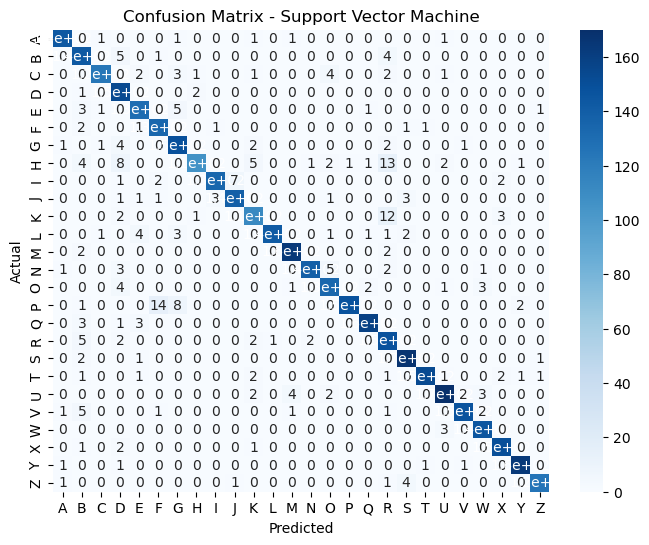

In [15]:
plt.figure(figsize=(8, 6))
svm_cm = pd.crosstab(y_test, svm_predictions, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(svm_cm, annot=True, cmap='Blues')
plt.title('Confusion Matrix - Support Vector Machine')
plt.show()

### Comparison between models

In [62]:
performance_metrics = pd.DataFrame({
    'Algorithm': ['SVM', 'KNN', 'Decision Tree', 'Naive Bayes', 'Logistic Regression'],
    'Accuracy': [svm_accuracy, knn_accuracy, dt_accuracy, nb_accuracy, log_accuracy],
    'Precision': [svm_precision, knn_precision, dt_precision, nb_precision, log_precision],
    'Recall': [svm_recall, knn_recall, dt_recall, nb_recall, log_recall],
    'F1-Score': [svm_f1, knn_f1, dt_f1, nb_f1, log_f1]
})
performance_metrics

,Algorithm,Accuracy,Precision,Recall,F1-Score
0,SVM,0.93050,0.934596,0.93050,0.930769
1,KNN,0.95200,0.953141,0.95200,0.952100
2,Decision Tree,0.89400,0.894908,0.89400,0.893966
3,Naive Bayes,0.54675,0.556271,0.54675,0.534308
4,Logistic Regression,0.73475,0.736254,0.73475,0.733335


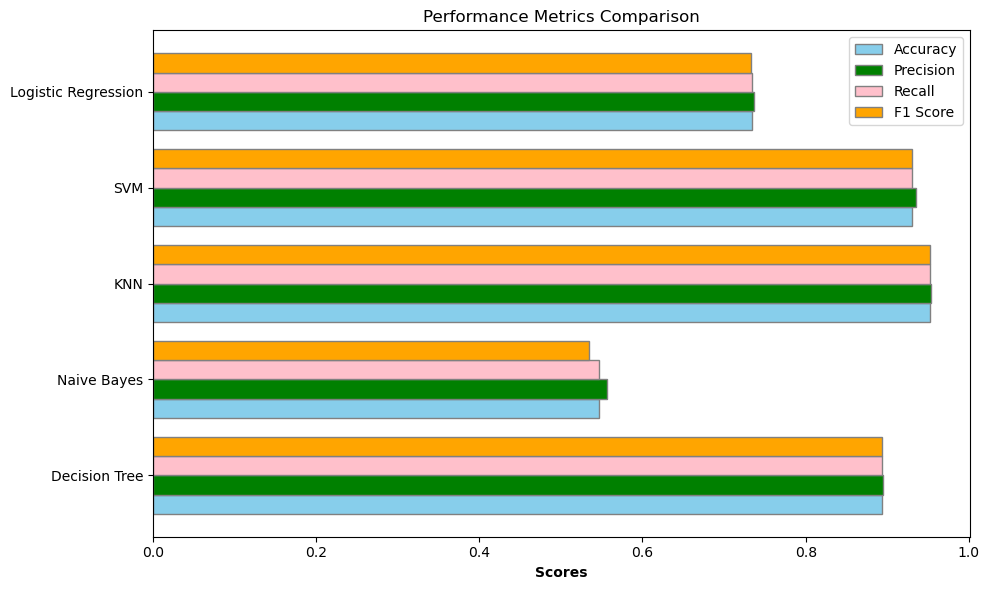

In [63]:
classifiers = ['Decision Tree', 'Naive Bayes', 'KNN', 'SVM', 'Logistic Regression']

accuracies = [dt_accuracy, nb_accuracy, knn_accuracy, svm_accuracy, log_accuracy]
precisions = [dt_precision, nb_precision, knn_precision, svm_precision, log_precision]
recalls = [dt_recall, nb_recall, knn_recall, svm_recall, log_recall]
f1_scores = [dt_f1, nb_f1, knn_f1, svm_f1, log_f1]


bar_height = 0.2

r1 = np.arange(len(classifiers))
r2 = [y + bar_height for y in r1]
r3 = [y + bar_height for y in r2]
r4 = [y + bar_height for y in r3]

plt.figure(figsize=(10, 6))
plt.barh(r1, accuracies, color='skyblue', height=bar_height, edgecolor='grey', label='Accuracy')
plt.barh(r2, precisions, color='g', height=bar_height, edgecolor='grey', label='Precision')
plt.barh(r3, recalls, color='pink', height=bar_height, edgecolor='grey', label='Recall')
plt.barh(r4, f1_scores, color='orange', height=bar_height, edgecolor='grey', label='F1 Score')

plt.yticks([r + bar_height*1.5 for r in range(len(classifiers))], classifiers)

plt.xlabel('Scores', fontweight='bold')
plt.title('Performance Metrics Comparison')

plt.legend()
plt.tight_layout()
plt.show()

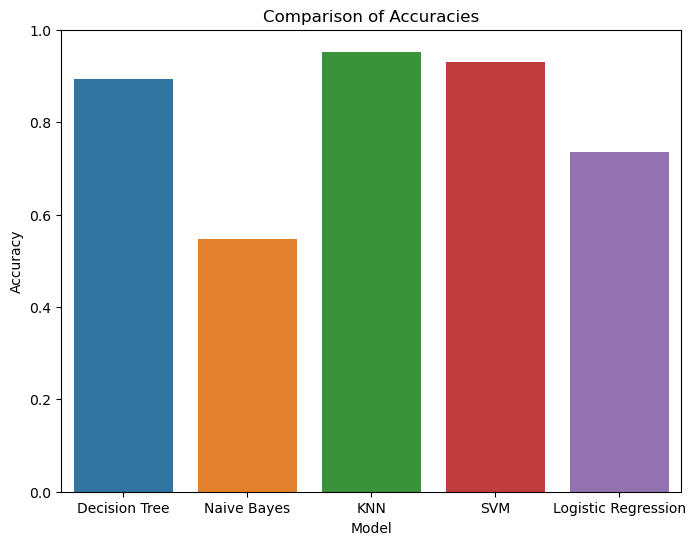

In [64]:

plt.figure(figsize=(8, 6))
sns.barplot(x=classifiers, y=accuracies)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Accuracies')
plt.ylim(0, 1)
plt.show()

### We can draw following conclusions after the comparisons:
### best model here is proving as knn.

# k-Fold Cross Validation

In [65]:
from sklearn.model_selection import cross_val_score, KFold
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

In [68]:
cv_scores_svm = cross_val_score(svm_model, X, y, cv=kf, scoring='accuracy')
cv_scores_dt = cross_val_score(dt_model, X, y, cv=kf, scoring='accuracy')
cv_scores_nb = cross_val_score(nb_model, X, y, cv=kf, scoring='accuracy')
cv_scores_knn = cross_val_score(knn_model, X, y, cv=kf, scoring='accuracy')
cv_scores_lr = cross_val_score(lr, X, y, cv=kf, scoring='accuracy')

C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

In [69]:
cv_metrics = pd.DataFrame({
    'Before k-fold': [svm_accuracy, knn_accuracy, dt_accuracy, log_accuracy, nb_accuracy],
    'After k-fold': [cv_scores_svm.mean() , cv_scores_knn.mean() , cv_scores_dt.mean() , cv_scores_lr.mean() , cv_scores_nb.mean()]
}, index=['SVM', 'KNN', 'Decision Tree', 'Logistic Regression', 'Naive Bayes'])

In [70]:
cv_metrics

,Before k-fold,After k-fold
SVM,0.93050,0.92580
KNN,0.95200,0.95295
Decision Tree,0.89400,0.88265
Logistic Regression,0.73475,0.72315
Naive Bayes,0.54675,0.54930


## Conclusions
What model is most suitable for this problem? 
In our case, KNN gives us good performance.

What model is least suitable for this problem? 
Naive Bayes as it takes the naive assumption that the features are independent of each other but in our dataset, features are interrelated with each other.

